<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            500 non-null    int64 
 1   Income             500 non-null    int64 
 2   Salary             500 non-null    int64 
 3   Additional Income  500 non-null    int64 
 4   Expenses           500 non-null    int64 
 5   Housing Expenses   500 non-null    int64 
 6   Debt Payments      500 non-null    int64 
 7   Savings            500 non-null    int64 
 8   Credit Score       500 non-null    int64 
 9   Debt Amount        500 non-null    int64 
 10  Age                500 non-null    int64 
 11  Marital Status     500 non-null    object
 12  Recommendation     500 non-null    int64 
 13  Savings Goal       500 non-null    int64 
 14  Investment Goal    500 non-null    int64 
dtypes: int64(14), object(1)
memory usage: 58.7+ KB
None
   User ID  Income  Salary  Additional 

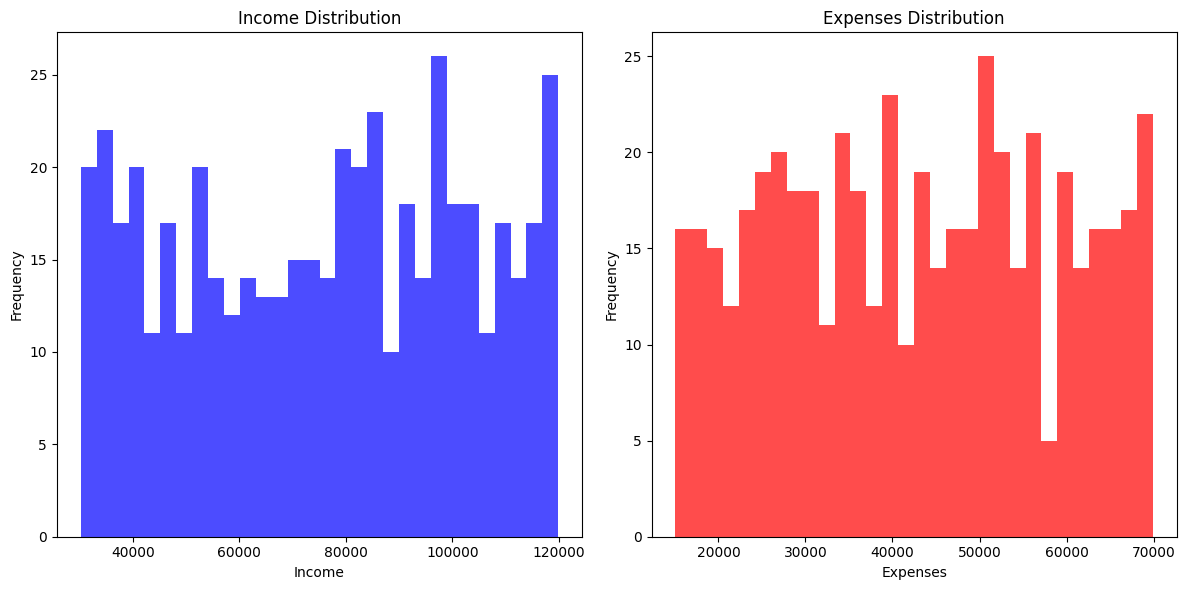

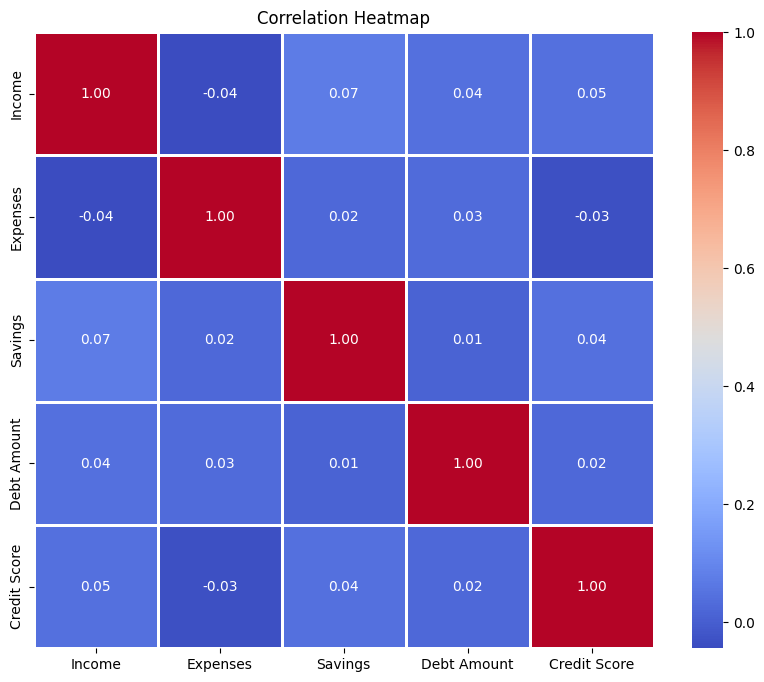

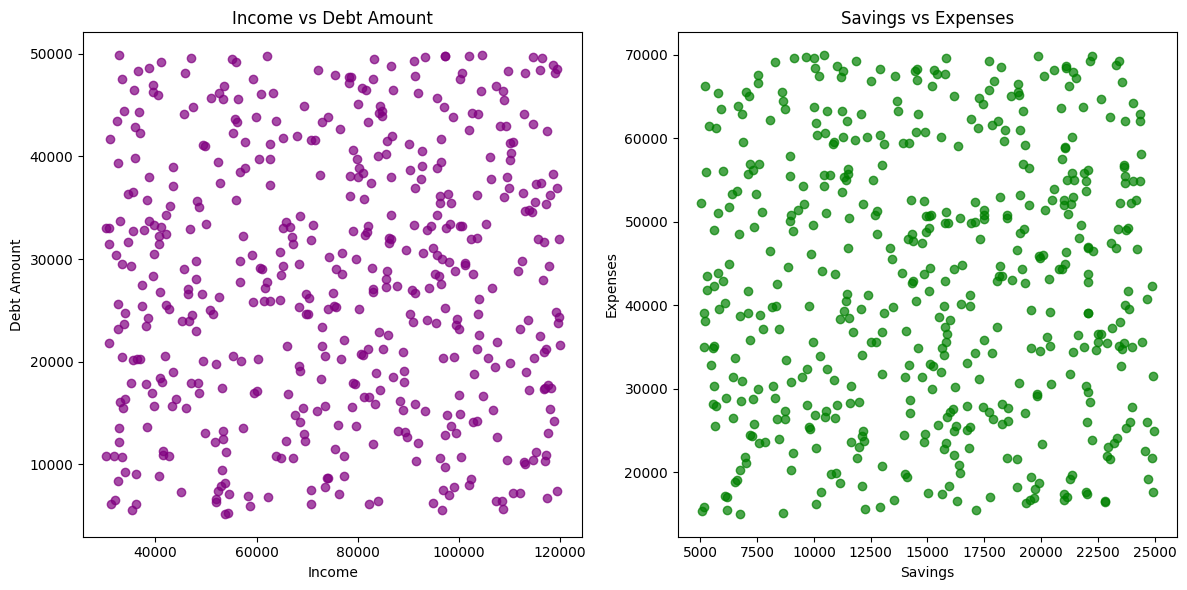

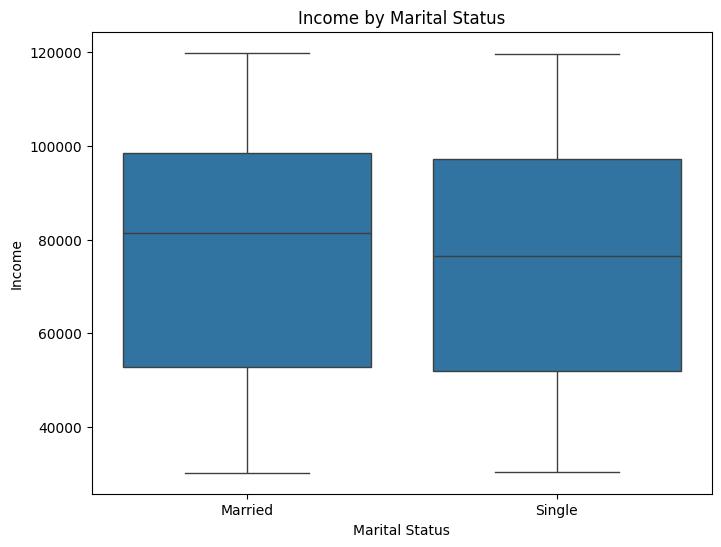

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6919 - loss: 0.6452 - val_accuracy: 0.7400 - val_loss: 0.5796
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7221 - loss: 0.6028 - val_accuracy: 0.7400 - val_loss: 0.5653
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7135 - loss: 0.5938 - val_accuracy: 0.7400 - val_loss: 0.5633
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7544 - loss: 0.5460 - val_accuracy: 0.7400 - val_loss: 0.5663
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7152 - loss: 0.5708 - val_accuracy: 0.7400 - val_loss: 0.5705
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7008 - loss: 0.5765 - val_accuracy: 0.7400 - val_loss: 0.5745
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6986 - loss: 0.5789 - val_accuracy: 0.7400 - val_loss: 0.5772
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7268 - loss: 0.5453 - val_accuracy: 0.7400 - val_loss

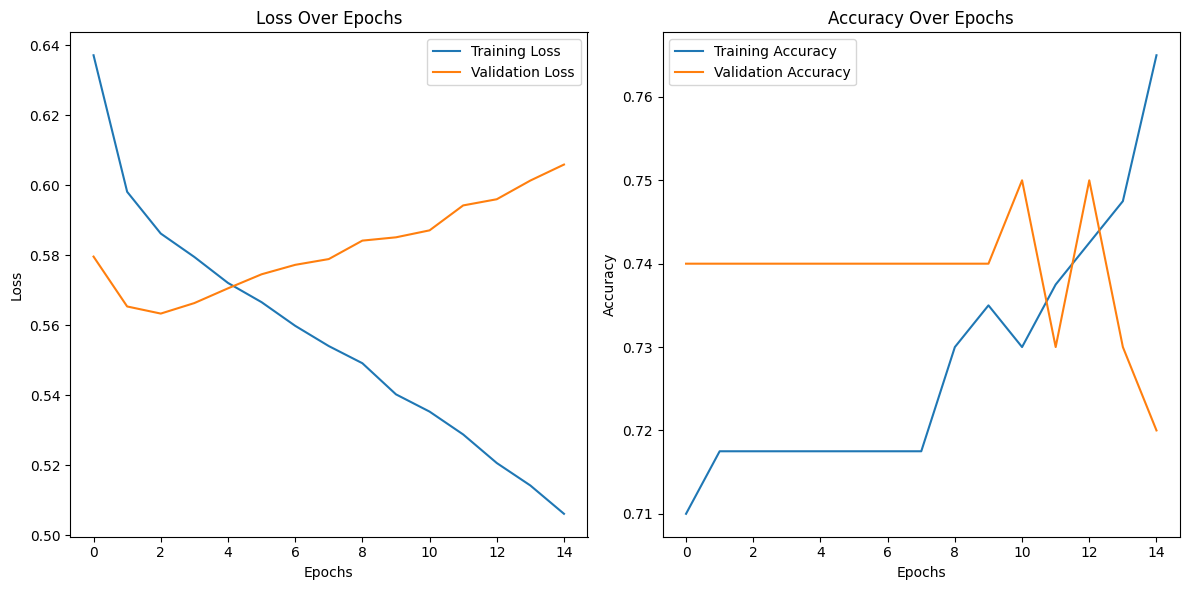

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


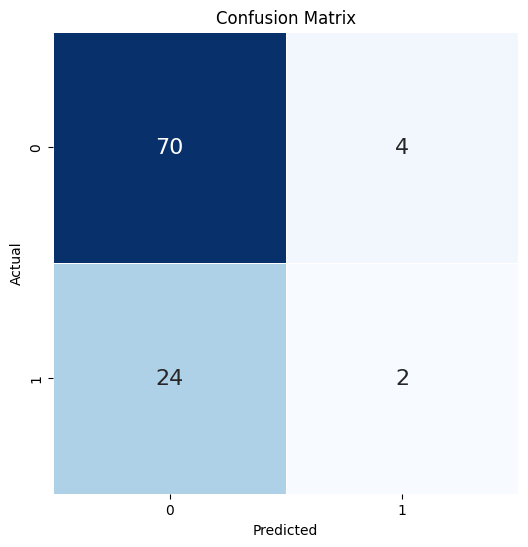

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset (ensure your file path is correct)
df = pd.read_csv('personal_finance_dataset.csv')

# Show dataset info and preview
print(df.info())
print(df.head())

# Data Visualization

# Distribution of 'Income' and 'Expenses'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Income'], bins=30, alpha=0.7, color='blue', label='Income')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Expenses'], bins=30, alpha=0.7, color='red', label='Expenses')
plt.title('Expenses Distribution')
plt.xlabel('Expenses')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation = df[['Income', 'Expenses', 'Savings', 'Debt Amount', 'Credit Score']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots for 'Income' vs 'Debt Amount', and 'Savings' vs 'Expenses'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df['Income'], df['Debt Amount'], alpha=0.7, color='purple')
plt.title('Income vs Debt Amount')
plt.xlabel('Income')
plt.ylabel('Debt Amount')

plt.subplot(1, 2, 2)
plt.scatter(df['Savings'], df['Expenses'], alpha=0.7, color='green')
plt.title('Savings vs Expenses')
plt.xlabel('Savings')
plt.ylabel('Expenses')

plt.tight_layout()
plt.show()

# Boxplot of 'Income' by 'Marital Status'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Marital Status', y='Income', data=df)
plt.title('Income by Marital Status')
plt.show()

# Preprocessing the Data

# Convert 'Marital Status' to numerical values
df['Marital Status'] = df['Marital Status'].map({'Single': 0, 'Married': 1})

# Features and target variable
X = df[['Income', 'Expenses', 'Housing Expenses', 'Debt Payments', 'Savings', 'Credit Score', 'Debt Amount', 'Age', 'Marital Status', 'Savings Goal', 'Investment Goal']]
y = df['Recommendation']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Deep Learning Model Definition
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot training history (Loss and Accuracy)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Generate predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32")

# Create a confusion matrix and plot it
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16}, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


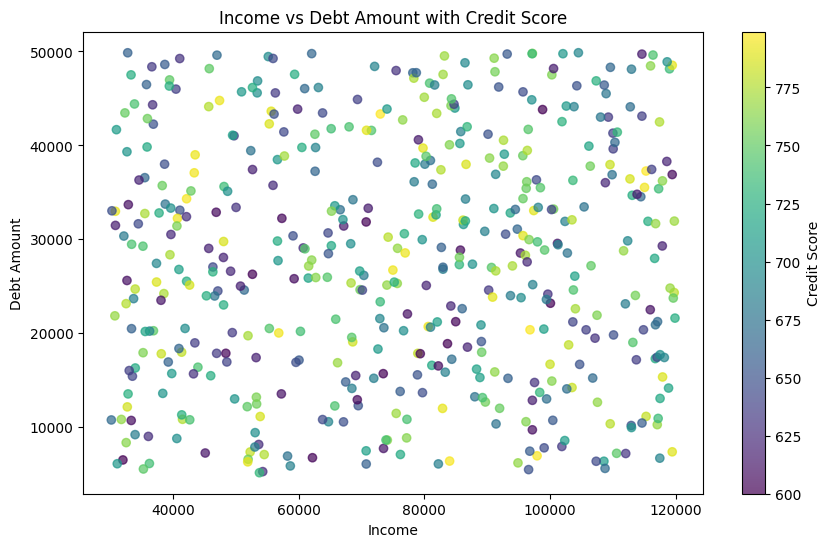

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Income'], df['Debt Amount'], c=df['Credit Score'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Credit Score')
plt.title('Income vs Debt Amount with Credit Score')
plt.xlabel('Income')
plt.ylabel('Debt Amount')
plt.show()

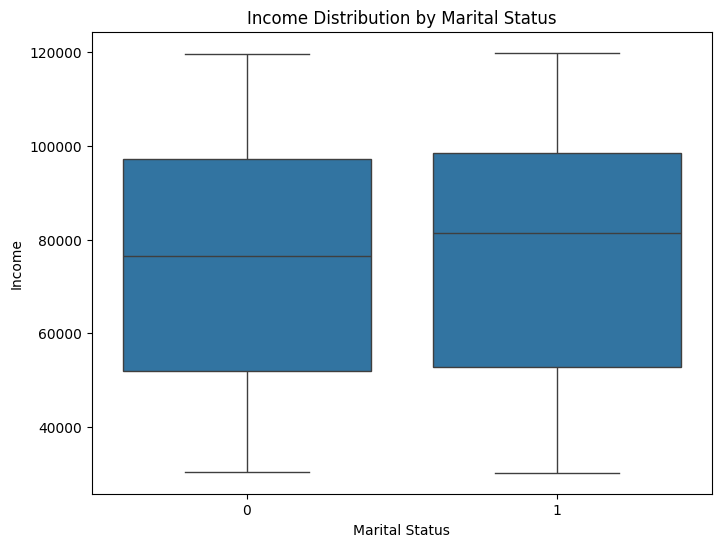

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Marital Status', y='Income', data=df)
plt.title('Income Distribution by Marital Status')
plt.show()

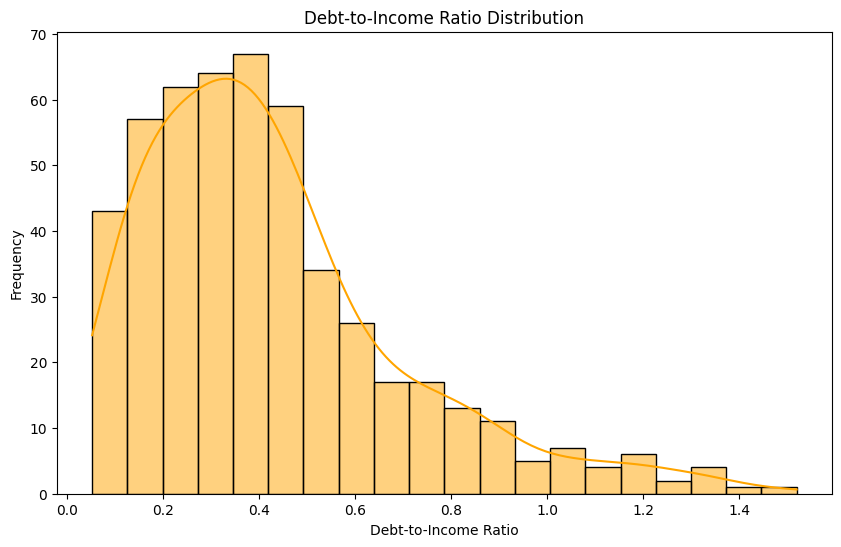

In [10]:
df['Debt-to-Income Ratio'] = df['Debt Amount'] / df['Income']
plt.figure(figsize=(10, 6))
sns.histplot(df['Debt-to-Income Ratio'], kde=True, color='orange')
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

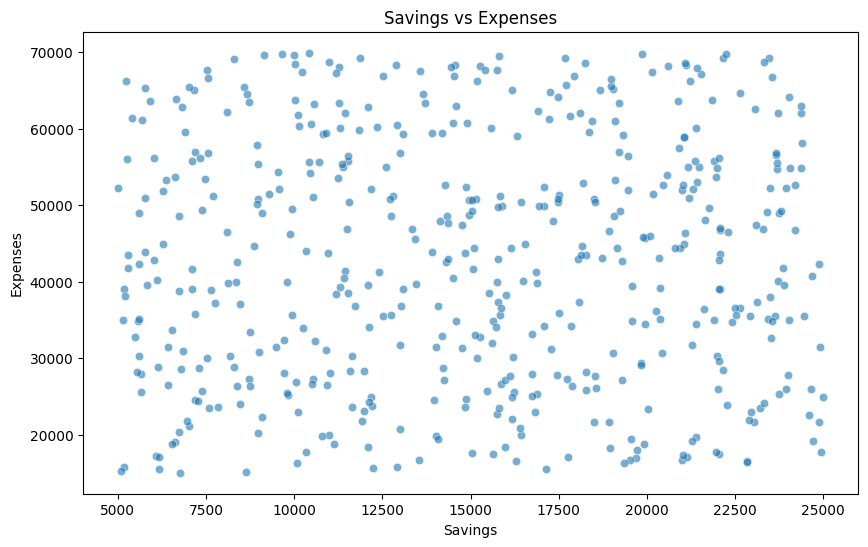

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Savings', y='Expenses', data=df, alpha=0.6)
plt.title('Savings vs Expenses')
plt.xlabel('Savings')
plt.ylabel('Expenses')
plt.show()

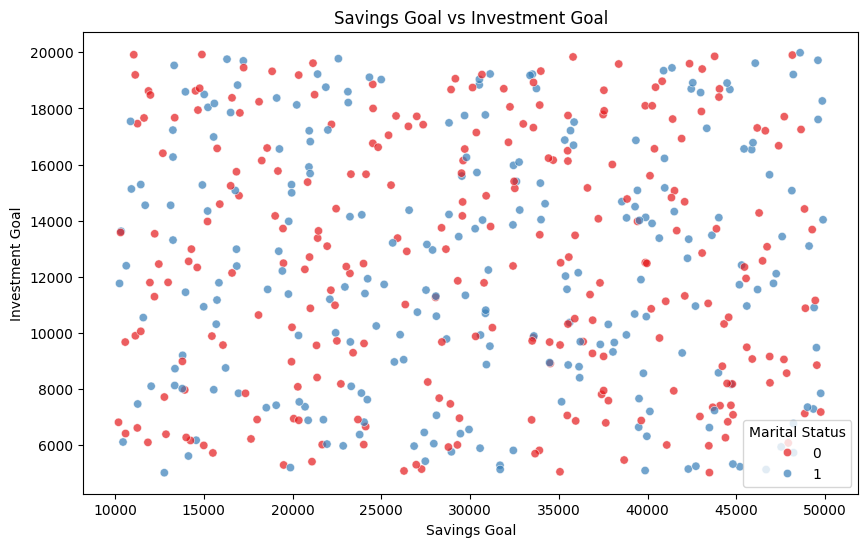

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Savings Goal', y='Investment Goal', data=df, hue='Marital Status', palette='Set1', alpha=0.7)
plt.title('Savings Goal vs Investment Goal')
plt.xlabel('Savings Goal')
plt.ylabel('Investment Goal')
plt.show()


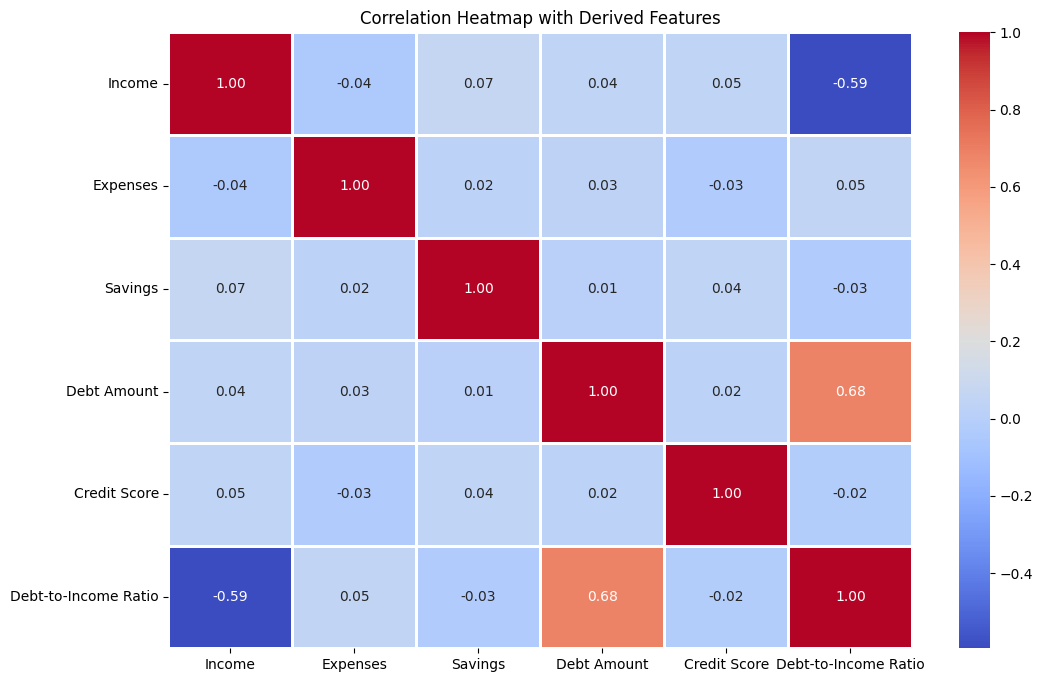

In [13]:
df['Debt-to-Income Ratio'] = df['Debt Amount'] / df['Income']
correlation = df[['Income', 'Expenses', 'Savings', 'Debt Amount', 'Credit Score', 'Debt-to-Income Ratio']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
plt.title('Correlation Heatmap with Derived Features')
plt.show()

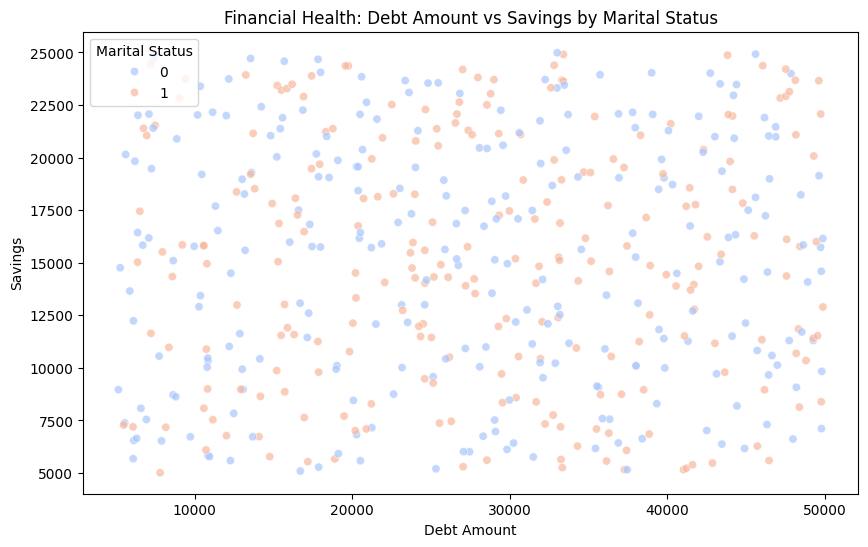

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Debt Amount', y='Savings', hue='Marital Status', data=df, palette='coolwarm', alpha=0.7)
plt.title('Financial Health: Debt Amount vs Savings by Marital Status')
plt.xlabel('Debt Amount')
plt.ylabel('Savings')
plt.show()


<ipython-input-15-3fae743c4db7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Recommendation', data=df, palette='Set2')


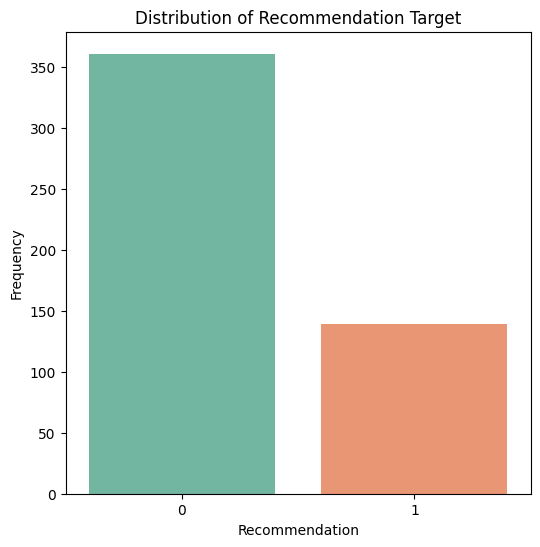

In [15]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Recommendation', data=df, palette='Set2')
plt.title('Distribution of Recommendation Target')
plt.xlabel('Recommendation')
plt.ylabel('Frequency')
plt.show()

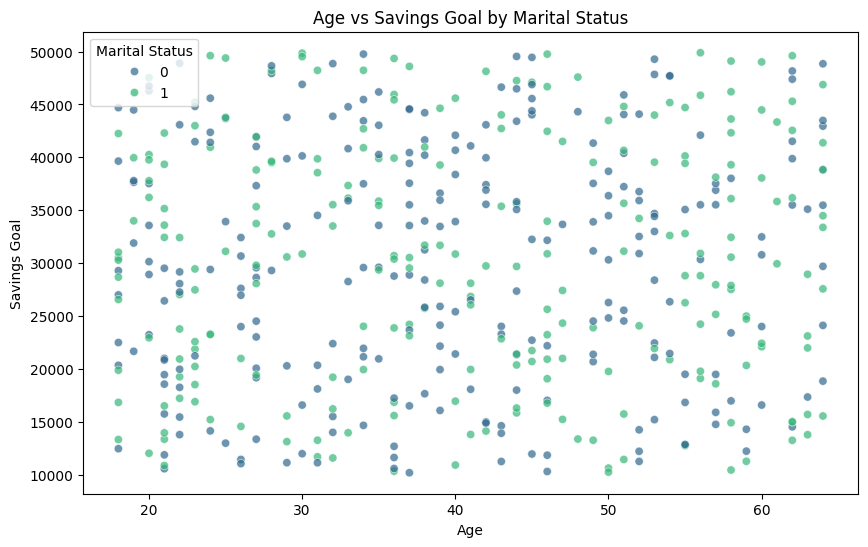

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Savings Goal', data=df, hue='Marital Status', palette='viridis', alpha=0.7)
plt.title('Age vs Savings Goal by Marital Status')
plt.xlabel('Age')
plt.ylabel('Savings Goal')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


              precision    recall  f1-score   support

           0       0.38      0.32      0.35        57
           1       0.32      0.28      0.30        47
           2       0.26      0.35      0.30        46

    accuracy                           0.31       150
   macro avg       0.32      0.31      0.31       150
weighted avg       0.32      0.31      0.31       150

Accuracy: 0.31333333333333335


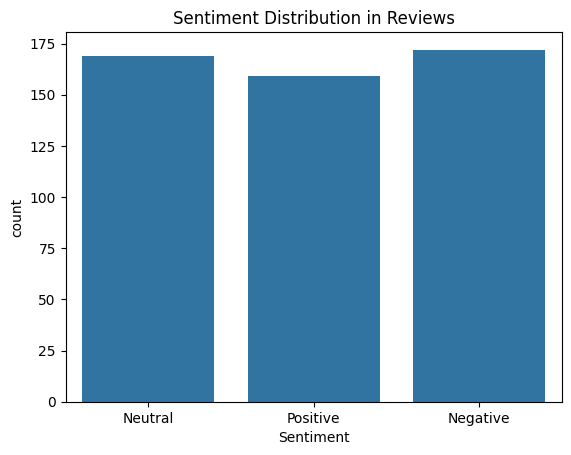

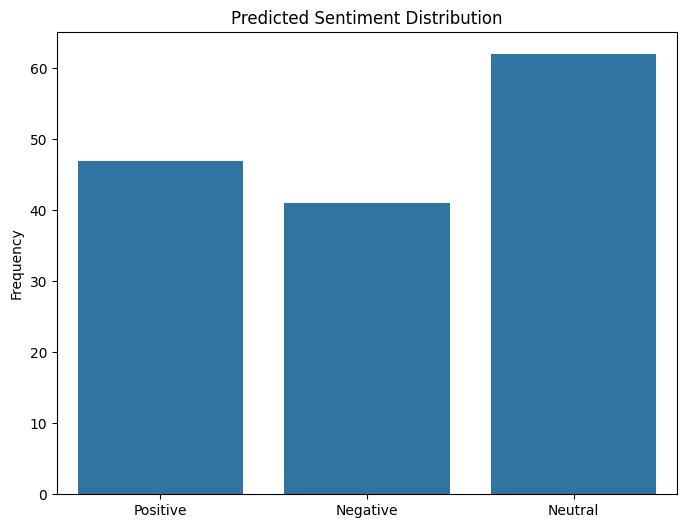

In [29]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset (assuming it's saved as a CSV)
df = pd.read_csv('sentiment_data.csv')

# NLP Preprocessing
nltk.download('stopwords')
from nltk.corpus import stopwords

def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to review text
df['Cleaned Review'] = df['Review Text'].apply(preprocess_text)

# Vectorize the cleaned text using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Cleaned Review'])

# Sentiment labels
y = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else (0 if x == 'Negative' else 2))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Visualize the sentiment distribution in the dataset
sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution in Reviews")
plt.show()

# Visualize the predicted sentiment distribution
y_pred_labels = ['Positive', 'Negative', 'Neutral']
predicted_labels = [y_pred.tolist().count(i) for i in range(3)]

plt.figure(figsize=(8, 6))
sns.barplot(x=y_pred_labels, y=predicted_labels)
plt.title("Predicted Sentiment Distribution")
plt.ylabel("Frequency")
plt.show()